# IMPORTS

In [1]:
## LIBRARIES
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install matplotlib
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
!pip install -U scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
!pip install flaml
from flaml import AutoML
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTENC

     |████████████████████████████████| 157 kB 5.0 MB/s 
     |████████████████████████████████| 2.0 MB 44.8 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


# DATA PRE-PROCESSING

In [2]:
## LOADING DATASET
df = pd.read_csv('https://drive.google.com/uc?export=download&id='+'https://drive.google.com/file/d/1V3CKBmph1HyFbgx70AKPsNoZp_txj0rw/view?usp=sharing'.split('/')[-2], sep=';', decimal=',', encoding='utf8')
df

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345633,21/01/2020,20,{'model': 2020; 'device_score': 3; 'os': 'ANDR...,Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,15/01/2020,7,{'model': 2020; 'device_score': 1; 'os': 'ANDR...,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,17/01/2020,11,"{'model': 2020; 'device_score': 1; 'os': ','}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,5/01/2020,11,{'model': 2020; 'device_score': 3; 'os': 'WEB'},MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,30/01/2020,10,{'model': 2020; 'device_score': 3; 'os': '%%'},NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,8/01/2020,13,{'model': 2020; 'device_score': 2; 'os': 'ANDR...,NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,14/01/2020,15,{'model': 2020; 'device_score': 2; 'os': 'WEB'},NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,16/01/2020,11,{'model': 2020; 'device_score': 2; 'os': 'WEB'},NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,13/01/2020,17,"{'model': 2020; 'device_score': 5; 'os': ','}",NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,2.418266,0.217644,False


In [3]:
## INITIAL COLUMNS AND DATA TYPES
df.dtypes

ID_USER              int64
genero              object
monto              float64
fecha               object
hora                 int64
dispositivo         object
establecimiento     object
ciudad              object
tipo_tc             object
linea_tc             int64
interes_tc           int64
status_txn          object
is_prime              bool
dcto               float64
cashback           float64
fraude                bool
dtype: object

In [4]:
## FIXING DATA TYPES

# Transforming columns to category
for i in ['ID_USER', 'genero', 'hora', 'establecimiento', 'ciudad', 'tipo_tc', 'status_txn', 'is_prime', 'fraude']:
    df[i] = df[i].astype("category")

# Transforming "dispositivo" to dictionary
df['dispositivo'] = df['dispositivo'].apply(lambda x : eval(x.replace('; ', ', ')))

# Transforming date to datetime
df['fecha'] = pd.to_datetime(df['fecha'])

df

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345633,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False
2,1,F,790.037653,2020-01-17,11,"{'model': 2020, 'device_score': 1, 'os': ','}",NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False
3,1,F,767.005387,2020-05-01,11,"{'model': 2020, 'device_score': 3, 'os': 'WEB'}",MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False
4,1,F,254.171053,2020-01-30,10,"{'model': 2020, 'device_score': 3, 'os': '%%'}",NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,2020-08-01,13,"{'model': 2020, 'device_score': 2, 'os': 'ANDR...",NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,7.461921,False
26971,3999,M,941.804966,2020-01-14,15,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,9.418050,False
26972,3999,M,251.189885,2020-01-16,11,"{'model': 2020, 'device_score': 2, 'os': 'WEB'}",NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False
26973,3999,M,24.182665,2020-01-13,17,"{'model': 2020, 'device_score': 5, 'os': ','}",NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,2.418266,0.217644,False


In [5]:
## CREATING NEW VARIABLES

# Variables based on "dispositivo"
df['dispositivo_device_score'] = df['dispositivo'].apply(lambda x : x['device_score']).astype("int")
df['dispositivo_os'] = df['dispositivo'].apply(lambda x : x['os']).astype("category")
df = df.drop(columns=['dispositivo'])

# Variables based on "fecha"
df['fecha_dia_de_la_semana'] = df['fecha'].apply(lambda x : x.dayofweek).astype("category")
df['fecha_fin_de_semana'] = df['fecha_dia_de_la_semana'].apply(lambda x : True if x==5 or x==6 else False).astype("category")
df['fecha_mes'] = df['fecha'].apply(lambda x : x.month).astype("category")
df = df.drop(columns=['fecha'])

# Variables based on "hora"
df['fecha_hora'] = df['hora']
def franja(hora):
    if hora in [2,3,4,5]:
        return "madrugada"
    elif hora in [6,7,8,9]:
        return "mañana"
    elif hora in [10,11,12,13]:
        return "mediodía"
    elif hora in [14,15,16,17]:
        return "tarde"
    elif hora in [18,19,20,21]:
        return "noche"
    else: return "medianoche"
df['fecha_franja_horaria'] = df['fecha_hora'].apply(franja).astype("category")
df = df.drop(columns=['hora'])

df

,ID_USER,genero,monto,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dispositivo_device_score,dispositivo_os,fecha_dia_de_la_semana,fecha_fin_de_semana,fecha_mes,fecha_hora,fecha_franja_horaria
0,0,F,608.345633,Super,Merida,FÃ­sica,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,1,False,1,20,noche
1,0,F,88.719243,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,2,False,1,7,mañana
2,1,F,790.037653,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,",",4,False,1,11,mediodía
3,1,F,767.005387,MPago,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,4,False,5,11,mediodía
4,1,F,254.171053,NaN,Guadalajara,FÃ­sica,94000,56,Aceptada,False,0.000000,2.541711,False,3,%%,3,False,1,10,mediodía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,7.461921,False,2,ANDROID,5,True,8,13,mediodía
26971,3999,M,941.804966,NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,0.000000,9.418050,False,2,WEB,1,False,1,15,tarde
26972,3999,M,251.189885,NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False,2,WEB,3,False,1,11,mediodía
26973,3999,M,24.182665,NaN,Toluca,FÃ­sica,40000,56,Aceptada,False,2.418266,0.217644,False,5,",",0,False,1,17,tarde


In [6]:
## CLEANING AND FIXING SOME VARIABLES

# Replacing "--" with "NaN" on "genero".
df['genero'] = df['genero'].apply(lambda x: np.nan if x == '--' else x).astype("category")

# Replacing "FÃ­sica" with "Física" on "tipo_tc"
df['tipo_tc'] = df['tipo_tc'].apply(lambda x : x.replace('Ã­', 'í'))

# Replacing "%%" with "PORCENTAJE" and "," with "COMA" on "dispositivo_os"
df['dispositivo_os'] = df['dispositivo_os'].apply(lambda x : x.replace('%%', 'PORCENTAJE').replace(',', 'COMA'))

df

,ID_USER,genero,monto,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dispositivo_device_score,dispositivo_os,fecha_dia_de_la_semana,fecha_fin_de_semana,fecha_mes,fecha_hora,fecha_franja_horaria
0,0,F,608.345633,Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,1,False,1,20,noche
1,0,F,88.719243,NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,2,False,1,7,mañana
2,1,F,790.037653,NaN,Guadalajara,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,COMA,4,False,1,11,mediodía
3,1,F,767.005387,MPago,Guadalajara,Física,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,4,False,5,11,mediodía
4,1,F,254.171053,NaN,Guadalajara,Física,94000,56,Aceptada,False,0.000000,2.541711,False,3,PORCENTAJE,3,False,1,10,mediodía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,7.461921,False,2,ANDROID,5,True,8,13,mediodía
26971,3999,M,941.804966,NaN,Toluca,Física,40000,56,Aceptada,False,0.000000,9.418050,False,2,WEB,1,False,1,15,tarde
26972,3999,M,251.189885,NaN,Toluca,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False,2,WEB,3,False,1,11,mediodía
26973,3999,M,24.182665,NaN,Toluca,Física,40000,56,Aceptada,False,2.418266,0.217644,False,5,COMA,0,False,1,17,tarde


In [7]:
## FINAL COLUMNS AND DATA TYPES

# Creating two list (categorical and continuous variables)
category_columns = list(df.select_dtypes(include=['category']).columns)
category_columns.remove('fraude')
category_columns.remove('ID_USER')
category_columns.insert(len(category_columns), 'fraude')
int_columns = list(df.select_dtypes(include=['float64', 'int64']).columns)
df.dtypes

ID_USER                     category
genero                      category
monto                        float64
establecimiento             category
ciudad                      category
tipo_tc                     category
linea_tc                       int64
interes_tc                     int64
status_txn                  category
is_prime                    category
dcto                         float64
cashback                     float64
fraude                      category
dispositivo_device_score       int64
dispositivo_os              category
fecha_dia_de_la_semana      category
fecha_fin_de_semana         category
fecha_mes                   category
fecha_hora                  category
fecha_franja_horaria        category
dtype: object

# EXPLORATORY DATA ANALYSIS (EDA)

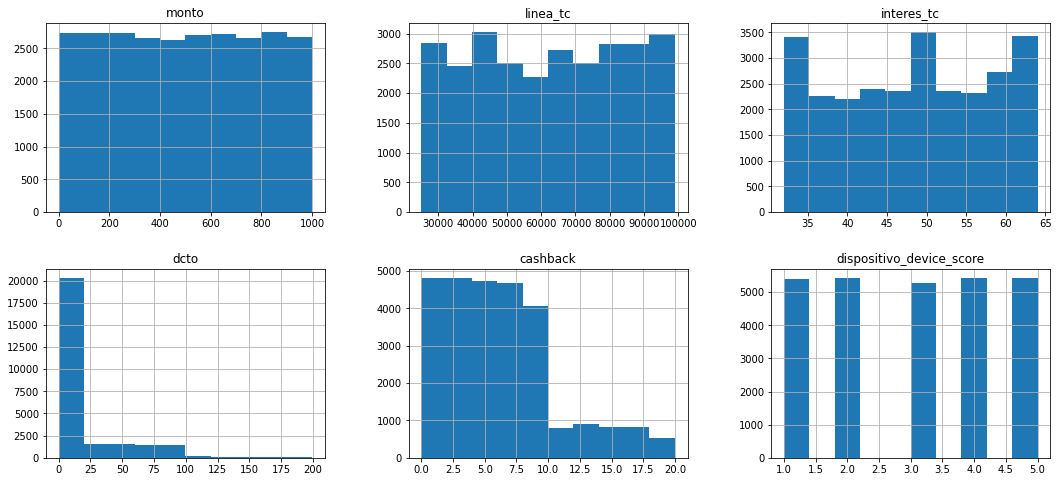

In [8]:
## DATA DISTRIBUTIONS

# Continuous variables distributions. "cashback" and "dcto" are skewed.
df[int_columns].hist(bins=10, figsize=(18, 8), layout=(2, 3));

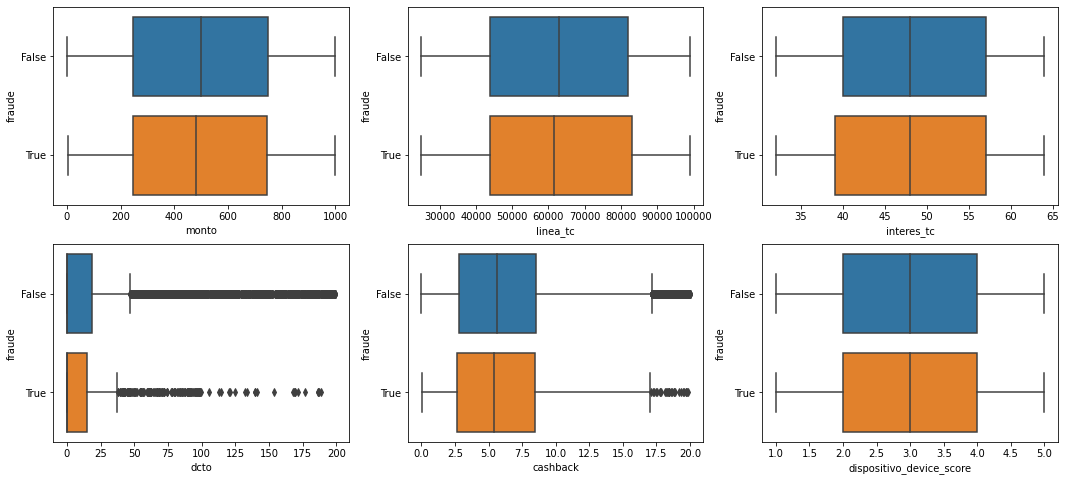

In [9]:
# Relation between continuos variables and response. "dcto" looks related with "fraude"
fig, ax = plt.subplots(2, 3, figsize=(18, 8))
for var, subplot in zip(int_columns, ax.flatten()):
    sns.boxplot(x=var, y='fraude', data=df, ax=subplot)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


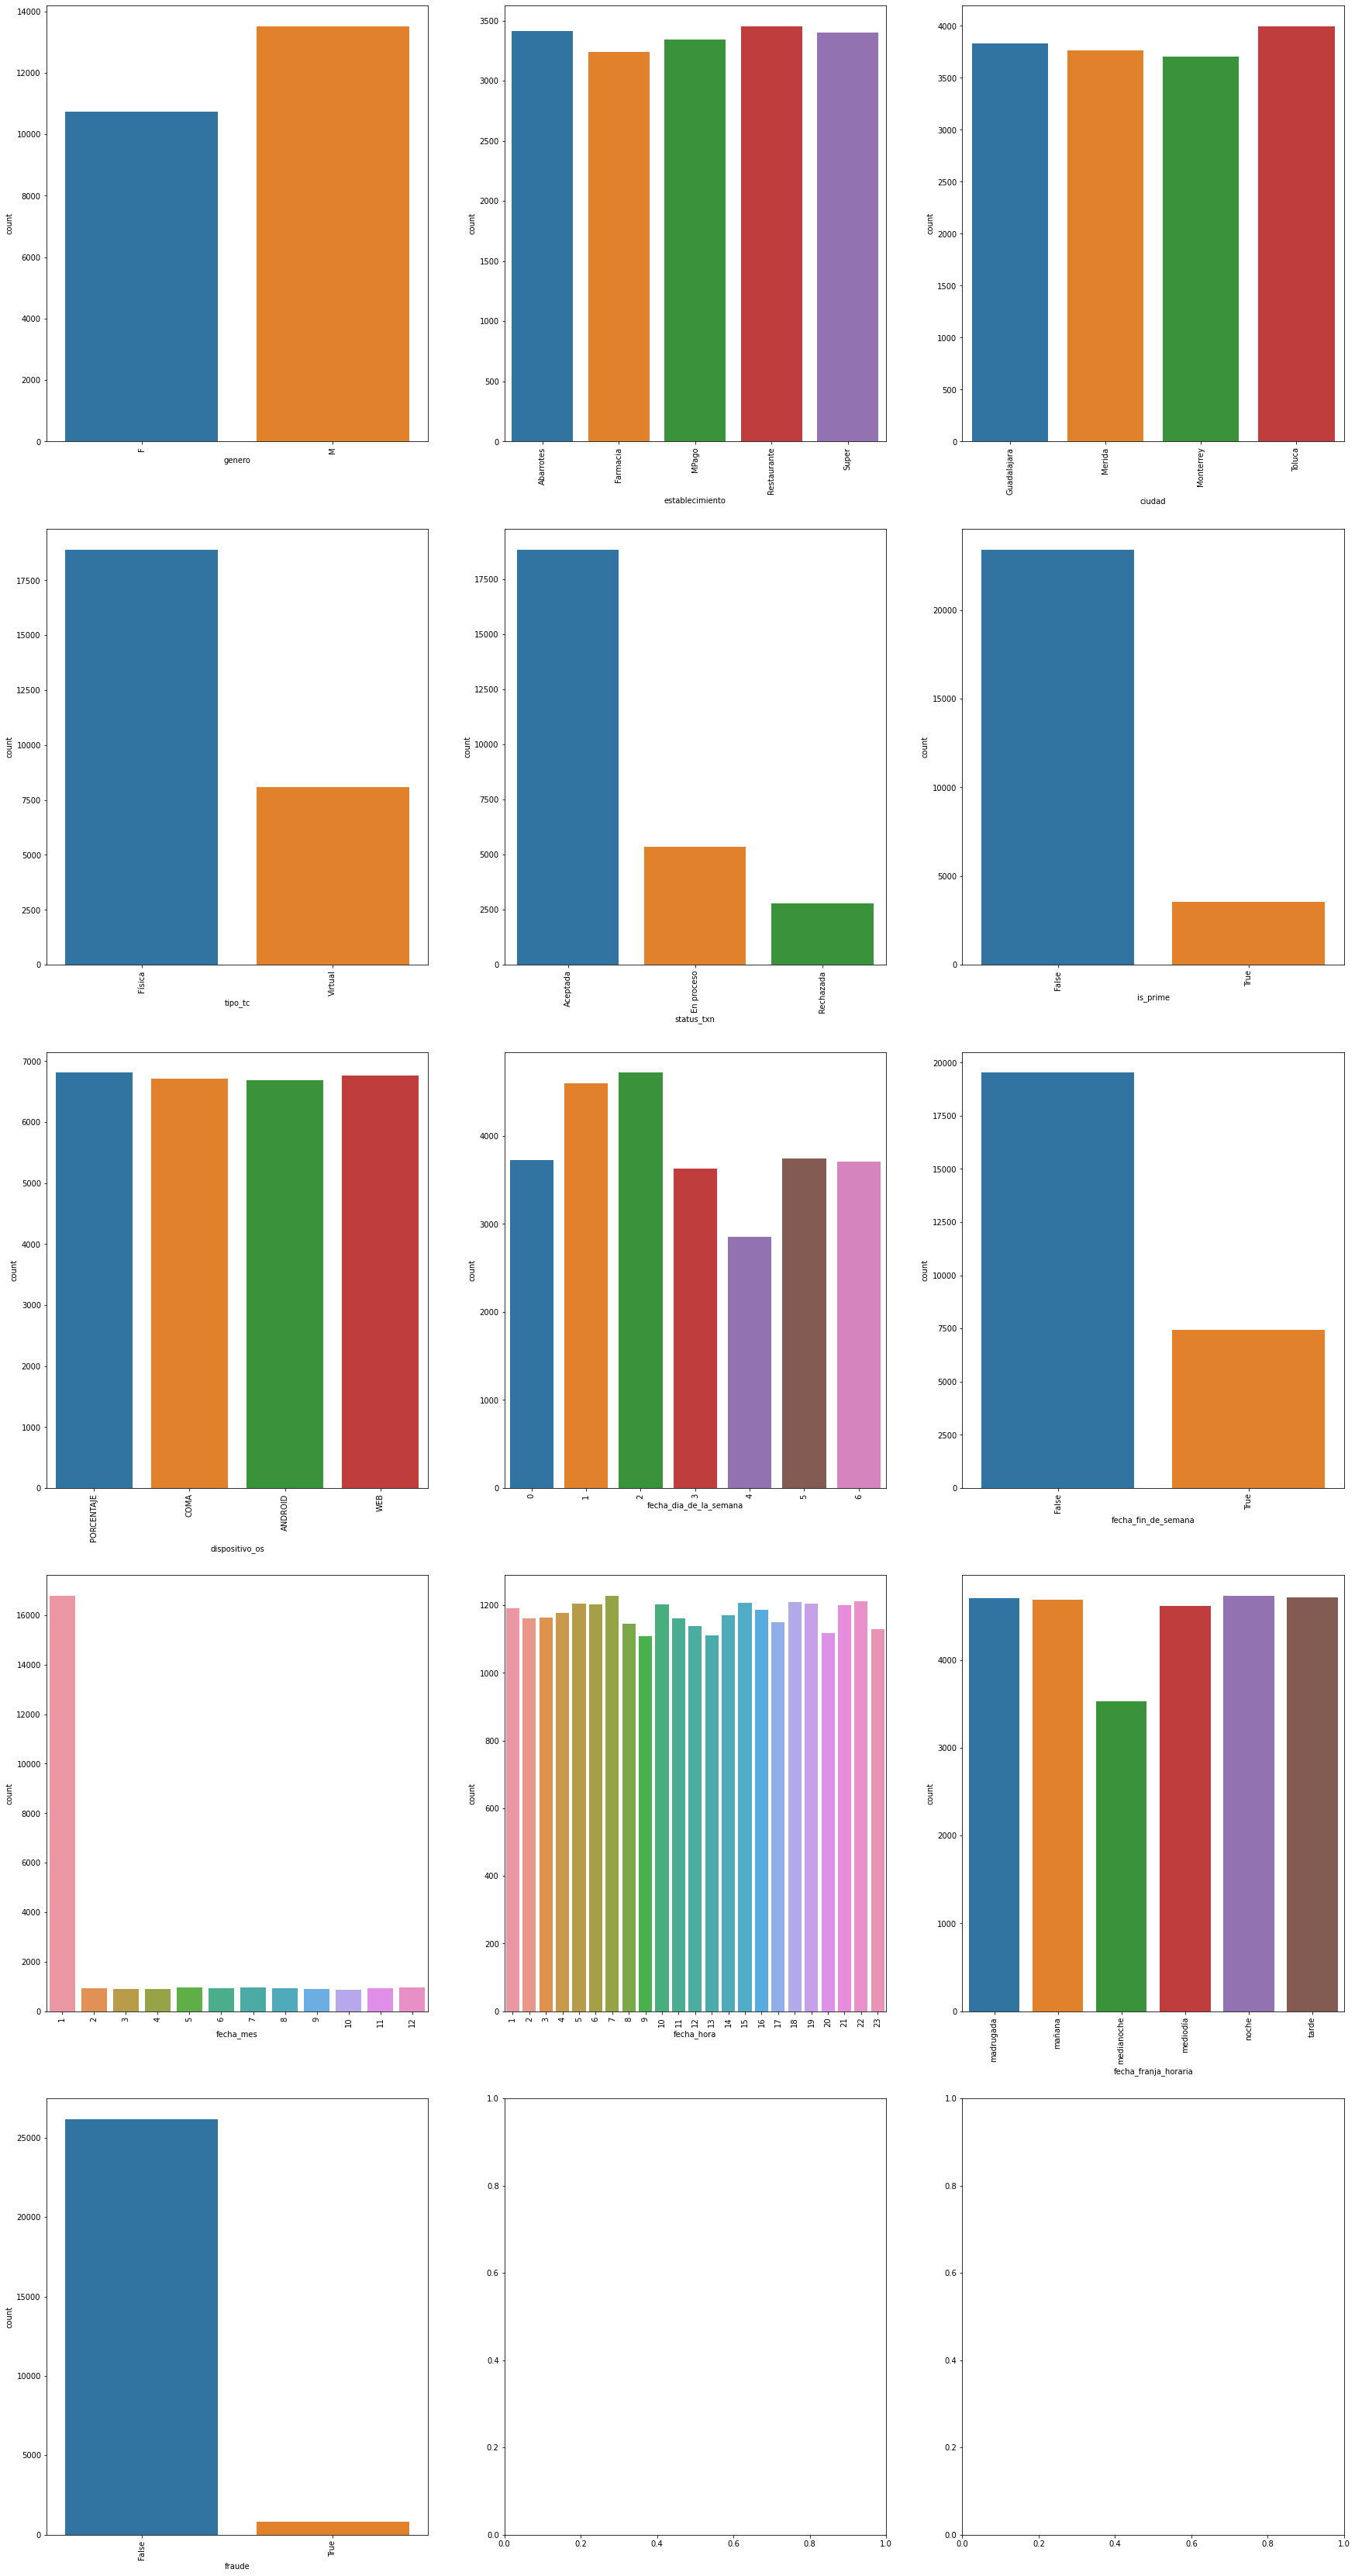

In [10]:
# Categorical variables distributions
fig, ax = plt.subplots(5, 3, figsize=(30, 60))
for variable, subplot in zip(category_columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


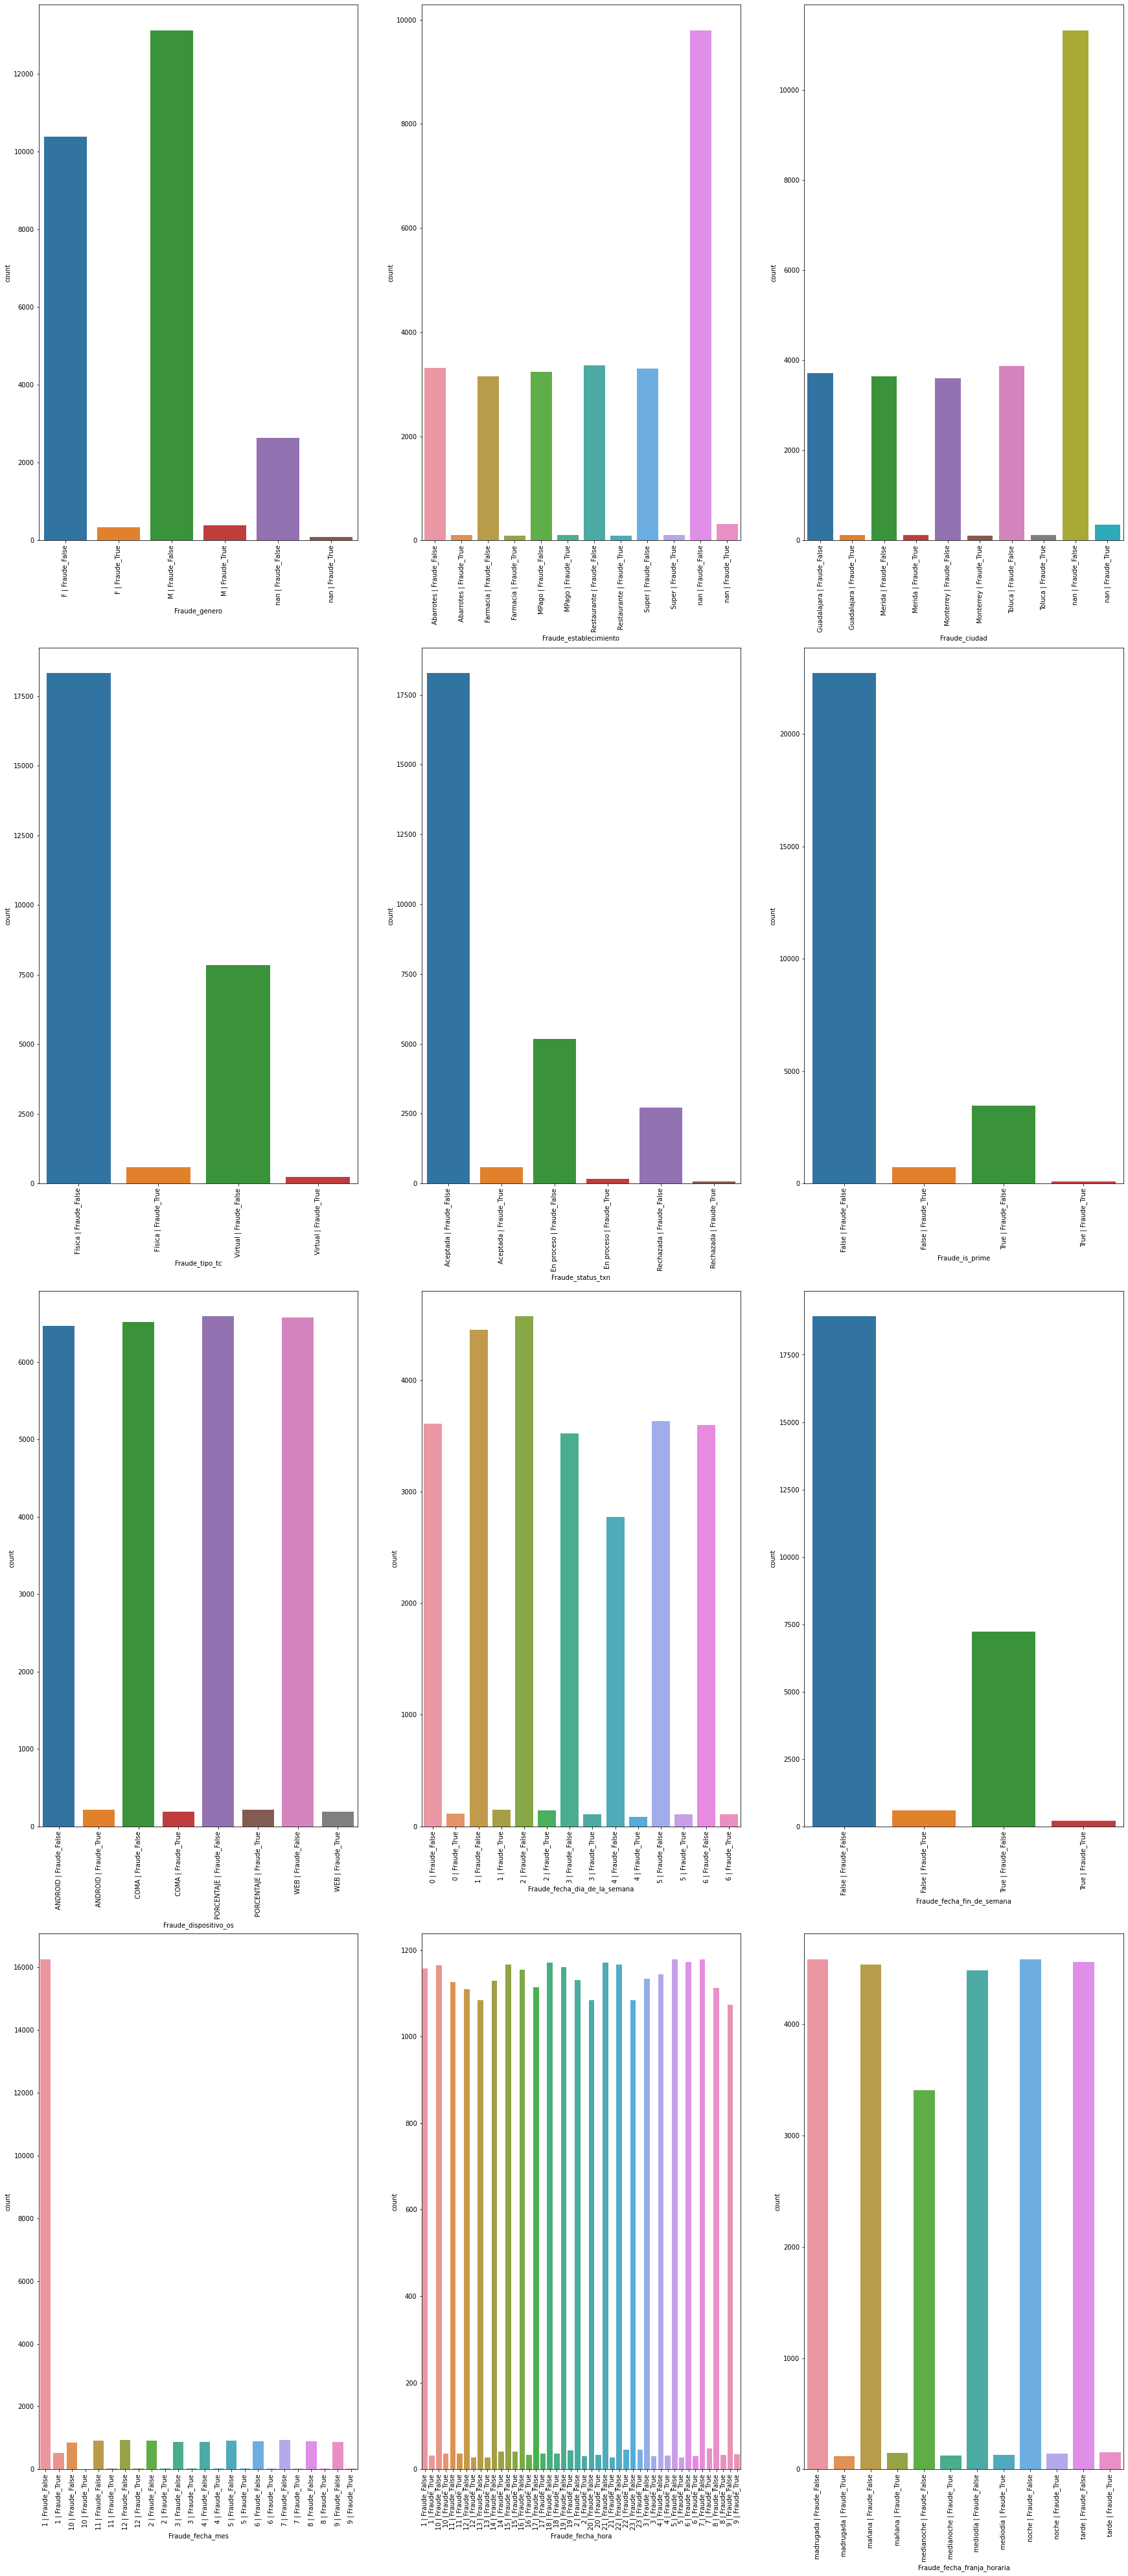

In [11]:
# Relation between categorical variables and response
data_category = df[category_columns].copy()
for column in data_category.columns:
  data_category[f'Fraude_{column}'] = (data_category[column].astype(str)+' | Fraude_'+data_category['fraude'].astype(str)).astype('category')
  data_category = data_category.drop(columns=[column])

ig, ax = plt.subplots(4, 3, figsize=(30, 70))
for variable, subplot in zip(list(data_category.columns), ax.flatten()):
    sns.countplot(data_category[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [12]:
# Removing atipical observations. This helps "dcto" with the skew
for column in int_columns:
    len_before = len(df)
    df['atipic'] = np.where(df[column]>np.mean(df[column])+5*np.std(df[column]), 1, 0)
    df = df[df['atipic']==0].drop(columns=['atipic'])
    len_after = len(df)
    print(f"{len_before-len_after} observations were eliminated for column {column}")

0 observations were eliminated for column monto
0 observations were eliminated for column linea_tc
0 observations were eliminated for column interes_tc
78 observations were eliminated for column dcto
0 observations were eliminated for column cashback
0 observations were eliminated for column dispositivo_device_score


In [13]:
## MISSING DATA

# Exploring missing data. We have 3 variables with missing values.
# "establecimiento" has 10119 missing values and "ciudad" has 11678. That's a lot of observations.
df.isnull().sum()

ID_USER                         0
genero                       2721
monto                           0
establecimiento             10094
ciudad                      11647
tipo_tc                         0
linea_tc                        0
interes_tc                      0
status_txn                      0
is_prime                        0
dcto                            0
cashback                        0
fraude                          0
dispositivo_device_score        0
dispositivo_os                  0
fecha_dia_de_la_semana          0
fecha_fin_de_semana             0
fecha_mes                       0
fecha_hora                      0
fecha_franja_horaria            0
dtype: int64

In [14]:
# Deleting "ciudad" and "establecimiento" because they have too much missing values
df = df.drop(columns=['ciudad', 'establecimiento'])

# Droping 2721 observations with NA values (genero)
df = df.dropna()

df

,ID_USER,genero,monto,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude,dispositivo_device_score,dispositivo_os,fecha_dia_de_la_semana,fecha_fin_de_semana,fecha_mes,fecha_hora,fecha_franja_horaria
0,0,F,608.345633,Física,71000,51,Aceptada,False,60.834563,5.475111,False,3,ANDROID,1,False,1,20,noche
1,0,F,88.719243,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False,1,ANDROID,2,False,1,7,mañana
2,1,F,790.037653,Virtual,94000,56,En proceso,False,0.000000,15.800753,False,1,COMA,4,False,1,11,mediodía
3,1,F,767.005387,Física,94000,56,Aceptada,False,0.000000,7.670054,False,3,WEB,4,False,5,11,mediodía
4,1,F,254.171053,Física,94000,56,Aceptada,False,0.000000,2.541711,False,3,PORCENTAJE,3,False,1,10,mediodía
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26970,3999,M,746.192089,Física,40000,56,Aceptada,False,0.000000,7.461921,False,2,ANDROID,5,True,8,13,mediodía
26971,3999,M,941.804966,Física,40000,56,Aceptada,False,0.000000,9.418050,False,2,WEB,1,False,1,15,tarde
26972,3999,M,251.189885,Virtual,40000,56,Aceptada,False,0.000000,5.023798,False,2,WEB,3,False,1,11,mediodía
26973,3999,M,24.182665,Física,40000,56,Aceptada,False,2.418266,0.217644,False,5,COMA,0,False,1,17,tarde


# MODELING - CLASSIFIER

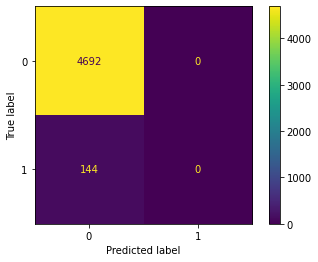

In [15]:
## FIRST MODEL TO DETECT PROBLEMS WITH IMBALANCED DATA

random_state = 9999

X_dummies = pd.get_dummies(df.copy().drop(columns=['fraude']))
y = df.copy()['fraude'].astype('int')

# Split stratified
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=random_state,
                                                    stratify=y, 
                                                    test_size=0.2)

# Simple Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Random Forest Classifier confusion matrix
y_test_pred = model.predict(X_test)
confusion_matrix_array = confusion_matrix(y_test.apply(int), y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_array, display_labels=[0,1]).plot()

In [16]:
# The accuracy is really good but the precision, recall and f1 are really bad because the dataset is imbalanced and the model is overfited.
tp = confusion_matrix_array[1][1]
tn = confusion_matrix_array[0][0]
fn = confusion_matrix_array[1][0]
fp = confusion_matrix_array[0][1]
accuracy = (tp+tn)/(tp+tn+fn+fp)
try:
  precision = tp/(tp+fp)
  if pd.isna(precision):
    precision = 0.0
except:
  precision = 0.0
try:
  recall = tp/(tp+fn)
  if pd.isna(recall):
    recall = 0.0
except:
  recall = 0.0
try:
  f1 = 2/((1/precision) + (1/recall))
  if pd.isna(f1):
    f1 = 0.0
except:
  f1 = 0.0
print(f'Accuracy:{round(accuracy, 2)}\nPrecision:{round(precision, 2)}\nRecall:{round(recall, 2)}\nF1:{round(f1, 2)}')

Accuracy:0.97
Precision:0.0
Recall:0.0
F1:0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [17]:
# Also, if you test it with Cross Validation, the f1_macro is really bad. It's about ~0.49
model_cv = RandomForestClassifier()
scores = cross_validate(model_cv, X_dummies, y, cv=5, n_jobs=1, scoring="f1_macro")
scores

{'fit_time': array([33.88629174, 40.44677329, 35.41827154, 34.2727232 , 35.52106571]),
 'score_time': array([0.46996498, 0.51998901, 0.5104177 , 0.51134849, 0.52430916]),
 'test_score': array([0.49073294, 0.49099905, 0.49244174, 0.49244174, 0.49238845])}

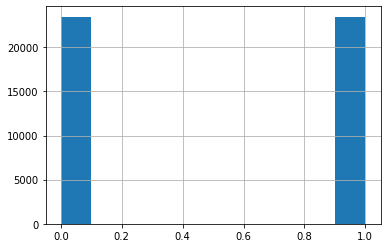

In [18]:
## DEALING WITH IMBALANCED DATA

X = df.copy().drop(columns=['fraude'])
y = df.copy()['fraude'].astype('int')

# Oversampling with SMOTE. Now we have a balanced dataset
oversample = SMOTENC(categorical_features=[0,1,3,6,7,11,12,13,14,15,16], random_state=random_state)
X, y = oversample.fit_resample(X, y)
y.hist()

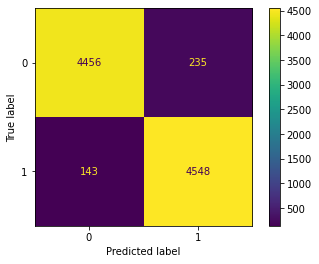

In [19]:
# Creating dummies
X_dummies = pd.get_dummies(X.copy())
y = y.copy()

# Split stratified
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=random_state,
                                                    stratify=y, 
                                                    test_size=0.2)

# Simple Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Random Forest Classifier confusion matrix. Now, the classification is way better
y_test_pred = model.predict(X_test)
confusion_matrix_array = confusion_matrix(y_test.apply(int), y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_array, display_labels=[0,1]).plot()

In [20]:
# The accuracy is really good again, but now, the precision, recall and f1 are really good because the dataset is balanced and the model is good fited.
tp = confusion_matrix_array[1][1]
tn = confusion_matrix_array[0][0]
fn = confusion_matrix_array[1][0]
fp = confusion_matrix_array[0][1]
accuracy = (tp+tn)/(tp+tn+fn+fp)
try:
  precision = tp/(tp+fp)
  if pd.isna(precision):
    precision = 0.0
except:
  precision = 0.0
try:
  recall = tp/(tp+fn)
  if pd.isna(recall):
    recall = 0.0
except:
  recall = 0.0
try:
  f1 = 2/((1/precision) + (1/recall))
  if pd.isna(f1):
    f1 = 0.0
except:
  f1 = 0.0
print(f'Accuracy:{round(accuracy, 2)}\nPrecision:{round(precision, 2)}\nRecall:{round(recall, 2)}\nF1:{round(f1, 2)}')

Accuracy:0.96
Precision:0.95
Recall:0.97
F1:0.96


In [21]:
# Also, if you test it with Cross Validation, the f-1 is really good now. It's about ~0.96
model_cv = RandomForestClassifier()
scores = cross_validate(model_cv, X_dummies, y, cv=5, n_jobs=1, scoring="f1_macro")
scores

{'fit_time': array([61.9659822 , 64.62578177, 65.24167514, 64.49838257, 64.41964626]),
 'score_time': array([0.79293036, 0.81891274, 1.30205297, 0.90813375, 0.89084005]),
 'test_score': array([0.90638453, 0.96330042, 0.97046044, 0.96970735, 0.96693005])}

In [22]:
## FEATURE SELECTION

# Using a FLAML Random Forest model to see the most important variables in all the oversampled dataset
task = 'classification'
estimator_list = ['rf']
model = AutoML(task=task, seed=random_state, estimator_list=estimator_list)
model.fit(X_train=X, y_train=y, task=task, seed=random_state, estimator_list=estimator_list)
features_importance = pd.DataFrame(X.columns, columns=['feature'])
features_importance['importance'] = model.model.model.feature_importances_
features_importance.sort_values(by='importance', ascending=False)

[flaml.automl: 04-22 02:08:33] {2105} INFO - task = classification
[flaml.automl: 04-22 02:08:33] {2107} INFO - Data split method: stratified
[flaml.automl: 04-22 02:08:33] {2111} INFO - Evaluation method: holdout
[flaml.automl: 04-22 02:08:33] {2188} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl: 04-22 02:08:33] {2281} INFO - List of ML learners in AutoML Run: ['rf']
[flaml.automl: 04-22 02:08:33] {2567} INFO - iteration 0, current learner rf
[flaml.automl: 04-22 02:08:34] {2698} INFO - Estimated sufficient time budget=18125s. Estimated necessary time budget=18s.
[flaml.automl: 04-22 02:08:34] {2750} INFO -  at 0.7s,	estimator rf's best error=0.2138,	best estimator rf's best error=0.2138
[flaml.automl: 04-22 02:08:34] {2567} INFO - iteration 1, current learner rf
[flaml.automl: 04-22 02:08:34] {2750} INFO -  at 1.0s,	estimator rf's best error=0.1813,	best estimator rf's best error=0.1813
[flaml.automl: 04-22 02:08:34] {2567} INFO - iteration 2, current learner rf
[flaml.auto

,feature,importance
12,fecha_dia_de_la_semana,0.110865
15,fecha_hora,0.099315
8,dcto,0.087863
11,dispositivo_os,0.085093
0,ID_USER,0.077755
9,cashback,0.071572
13,fecha_fin_de_semana,0.069477
6,status_txn,0.064609
16,fecha_franja_horaria,0.061646
14,fecha_mes,0.060715


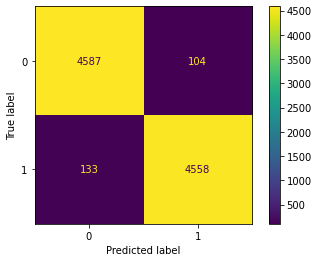

In [23]:
## FINAL MODEL

# Using the best 5 variables
X = df.copy()[['fecha_dia_de_la_semana', 'dcto', 'fecha_hora', 'dispositivo_os', 'ID_USER']]
y = df.copy()['fraude'].astype('int')
X
# Oversampling with SMOTE again. Now we have a balanced dataset with only 5 features
oversample = SMOTENC(categorical_features=[0,2,3,4], random_state=random_state)
X, y = oversample.fit_resample(X, y)
X_dummies = pd.get_dummies(X.copy())
dummies_columns = list(X_dummies.columns)

# Split stratified
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,
                                                    random_state=random_state,
                                                    stratify=y, 
                                                    test_size=0.2)

# Simple Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Random Forest Classifier confusion matrix. Now, the classification is the best
y_test_pred = model.predict(X_test)
confusion_matrix_array = confusion_matrix(y_test.apply(int), y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_array, display_labels=[0,1]).plot()

In [24]:
# Now the accuracy, precision, recall and f1 are even better than when all the variables are used.
tp = confusion_matrix_array[1][1]
tn = confusion_matrix_array[0][0]
fn = confusion_matrix_array[1][0]
fp = confusion_matrix_array[0][1]
accuracy = (tp+tn)/(tp+tn+fn+fp)
try:
  precision = tp/(tp+fp)
  if pd.isna(precision):
    precision = 0.0
except:
  precision = 0.0
try:
  recall = tp/(tp+fn)
  if pd.isna(recall):
    recall = 0.0
except:
  recall = 0.0
try:
  f1 = 2/((1/precision) + (1/recall))
  if pd.isna(f1):
    f1 = 0.0
except:
  f1 = 0.0
print(f'Accuracy:{round(accuracy, 2)}\nPrecision:{round(precision, 2)}\nRecall:{round(recall, 2)}\nF1:{round(f1, 2)}')

Accuracy:0.97
Precision:0.98
Recall:0.97
F1:0.97


In [25]:
# Also, if you test it with Cross Validation, the f-1 is really good yet. It's about ~0.95
model_cv = RandomForestClassifier()
scores = cross_validate(model_cv, X_dummies, y, cv=5, n_jobs=1, scoring="f1_macro")
scores

{'fit_time': array([111.12032962, 109.99613261, 125.64180851, 125.72953796,
        124.48518777]),
 'score_time': array([1.48199677, 2.33993864, 1.57366037, 1.53550267, 1.54026747]),
 'test_score': array([0.93623309, 0.94910417, 0.95489337, 0.94515849, 0.95691075])}

# MODELING - CLUSTERING

In [26]:
## CREATING DATASET FOR CLUSTERING

# I used the same most important variables in the model
df_clustering = df.copy()[['fecha_dia_de_la_semana', 'dcto', 'dispositivo_os', 'ID_USER', 'fraude', 'fecha_hora']]
df_clustering['dispositivo_os'].replace({"COMA": "OTROS", "PORCENTAJE": "OTROS"}, inplace=True)
df_clustering['ID_USER'] = df_clustering['ID_USER'].astype('str')

# Dataset with number of observations per user
df_clustering_count = df_clustering[['ID_USER']].copy()
df_clustering_count['count'] = 1
df_clustering_count = df_clustering_count.groupby('ID_USER').count().reset_index().rename(columns={"count": "n_observations"})

# Creating dummys
df_clustering = pd.get_dummies(df_clustering, columns=['fecha_dia_de_la_semana', 'dispositivo_os', 'fraude', 'fecha_hora'])
df_clustering = df_clustering.groupby('ID_USER').mean().reset_index().rename(columns={"dcto": "mean_dcto"})

# Final dataframe for clustering
df_clustering = pd.merge(df_clustering, df_clustering_count, on='ID_USER')
df_clustering['ID_USER'] = df_clustering['ID_USER'].astype('int')
for i in df_clustering.columns:
  df_clustering[i] = df_clustering[i].apply(lambda x : round(x, 2))
df_clustering['ID_USER'] = df_clustering['ID_USER'].astype('str')

df_clustering

,ID_USER,mean_dcto,fecha_dia_de_la_semana_0,fecha_dia_de_la_semana_1,fecha_dia_de_la_semana_2,fecha_dia_de_la_semana_3,fecha_dia_de_la_semana_4,fecha_dia_de_la_semana_5,fecha_dia_de_la_semana_6,dispositivo_os_OTROS,...,fecha_hora_15,fecha_hora_16,fecha_hora_17,fecha_hora_18,fecha_hora_19,fecha_hora_20,fecha_hora_21,fecha_hora_22,fecha_hora_23,n_observations
0,0,30.42,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.50,0.00,0.00,0.00,2
1,1,17.80,0.29,0.00,0.00,0.14,0.29,0.00,0.29,0.86,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7
2,10,0.00,0.00,0.50,0.00,0.00,0.00,0.50,0.00,0.50,...,0.00,0.00,0.50,0.00,0.0,0.00,0.50,0.00,0.00,2
3,1000,23.48,0.12,0.06,0.25,0.25,0.19,0.12,0.00,0.56,...,0.06,0.06,0.06,0.00,0.0,0.06,0.06,0.06,0.00,16
4,1001,61.45,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.50,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,995,45.59,0.00,0.00,0.00,0.00,0.20,0.40,0.40,0.80,...,0.00,0.00,0.40,0.00,0.0,0.20,0.20,0.00,0.00,5
3594,996,0.00,0.00,0.00,0.00,0.33,0.33,0.33,0.00,0.00,...,0.33,0.33,0.00,0.00,0.0,0.00,0.00,0.00,0.00,3
3595,997,20.18,0.16,0.10,0.26,0.13,0.10,0.10,0.16,0.48,...,0.13,0.00,0.06,0.06,0.0,0.00,0.06,0.03,0.10,31
3596,998,48.19,0.25,0.00,0.38,0.12,0.12,0.12,0.00,0.50,...,0.00,0.00,0.00,0.00,0.0,0.00,0.12,0.00,0.12,8


In [27]:
# I calculated PCA to visualize the clusters
pca = PCA(n_components=2)
transform_pca = pca.fit_transform(df_clustering.drop(columns=['ID_USER']))
df_clustering['principal_feature1'] = transform_pca[:,0]
df_clustering['principal_feature2'] = transform_pca[:,1]

df_clustering

,ID_USER,mean_dcto,fecha_dia_de_la_semana_0,fecha_dia_de_la_semana_1,fecha_dia_de_la_semana_2,fecha_dia_de_la_semana_3,fecha_dia_de_la_semana_4,fecha_dia_de_la_semana_5,fecha_dia_de_la_semana_6,dispositivo_os_OTROS,...,fecha_hora_17,fecha_hora_18,fecha_hora_19,fecha_hora_20,fecha_hora_21,fecha_hora_22,fecha_hora_23,n_observations,principal_feature1,principal_feature2
0,0,30.42,0.00,0.50,0.50,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.50,0.00,0.00,0.00,2,14.218565,-4.954740
1,1,17.80,0.29,0.00,0.00,0.14,0.29,0.00,0.29,0.86,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7,1.682509,0.251730
2,10,0.00,0.00,0.50,0.00,0.00,0.00,0.50,0.00,0.50,...,0.50,0.00,0.0,0.00,0.50,0.00,0.00,2,-16.197440,-4.451072
3,1000,23.48,0.12,0.06,0.25,0.25,0.19,0.12,0.00,0.56,...,0.06,0.00,0.0,0.06,0.06,0.06,0.00,16,7.511079,9.157308
4,1001,61.45,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,...,0.00,0.00,0.0,0.00,0.00,0.50,0.00,2,45.243354,-5.470517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,995,45.59,0.00,0.00,0.00,0.00,0.20,0.40,0.40,0.80,...,0.40,0.00,0.0,0.20,0.20,0.00,0.00,5,29.435309,-2.208353
3594,996,0.00,0.00,0.00,0.00,0.33,0.33,0.33,0.00,0.00,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,3,-16.180947,-3.449984
3595,997,20.18,0.16,0.10,0.26,0.13,0.10,0.10,0.16,0.48,...,0.06,0.06,0.0,0.00,0.06,0.03,0.10,31,4.460225,24.210266
3596,998,48.19,0.25,0.00,0.38,0.12,0.12,0.12,0.00,0.50,...,0.00,0.00,0.0,0.00,0.12,0.00,0.12,8,32.084846,0.748924


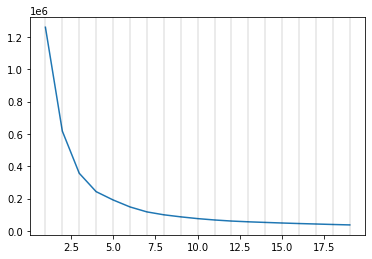

In [28]:
# Elbow method to determine the number of nodes
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter=10000).fit(df_clustering[['principal_feature1', 'principal_feature2']]) for i in n_cluster]
scores = [kmeans[i].inertia_ for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
for line in n_cluster:
    plt.axvline(line, alpha=0.1, c='black')
plt.show()

In [29]:
# 4 clusters it's a good number to reduce inertia
df_clustering['cluster'] = kmeans[3].predict(df_clustering[['principal_feature1', 'principal_feature2']])
df_clustering['cluster'].value_counts()

0    1436
2    1405
1     643
3     114
Name: cluster, dtype: int64

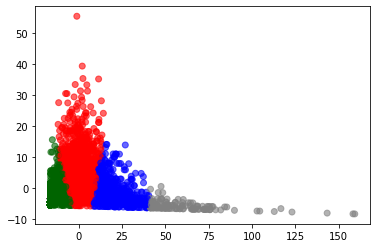

In [30]:
# Clusters graph
ig, ax = plt.subplots()
colors = {0:'darkgreen', 1:'blue', 2:'red', 3:'grey', 4:'orange', 5:'pink', 6:'lime', 7:'sandybrown', 8:'brown', 9:'purple', 10:'white', 11: 'royalblue', 12:'thistle', 13:'lightgreen', 14: 'black'}
ax.scatter(df_clustering['principal_feature1'], df_clustering['principal_feature2'], c=df_clustering["cluster"].apply(lambda x: colors[x]), alpha=0.6)
plt.show()

In [31]:
# Explore the clusters
df_analysis = df_clustering[['ID_USER', 'mean_dcto', 'fecha_dia_de_la_semana_0',
       'fecha_dia_de_la_semana_1', 'fecha_dia_de_la_semana_2',
       'fecha_dia_de_la_semana_3', 'fecha_dia_de_la_semana_4',
       'fecha_dia_de_la_semana_5', 'fecha_dia_de_la_semana_6',
       'dispositivo_os_OTROS', 'dispositivo_os_ANDROID',
       'dispositivo_os_WEB', 'fraude_False', 'fraude_True', 'fecha_hora_1',
       'fecha_hora_2', 'fecha_hora_3', 'fecha_hora_4', 'fecha_hora_5',
       'fecha_hora_6', 'fecha_hora_7', 'fecha_hora_8', 'fecha_hora_9',
       'fecha_hora_10', 'fecha_hora_11', 'fecha_hora_12', 'fecha_hora_13',
       'fecha_hora_14', 'fecha_hora_15', 'fecha_hora_16', 'fecha_hora_17',
       'fecha_hora_18', 'fecha_hora_19', 'fecha_hora_20', 'fecha_hora_21',
       'fecha_hora_22', 'fecha_hora_23', 'n_observations', 'cluster']]
for cluster, value in sorted(dict(df_analysis['cluster'].value_counts()).items()):
    print(f'************** CLUSTER {cluster} (color {colors[cluster]}) with {len(df_analysis[df_analysis["cluster"]==cluster])} observations *************\n')
    print(df_analysis[df_analysis['cluster']==cluster].drop(columns=['cluster']).describe().loc[['mean']].T.reset_index(), '\n\n')

************** CLUSTER 0 (color darkgreen) with 1436 observations *************

                       index      mean
0                  mean_dcto  1.805237
1   fecha_dia_de_la_semana_0  0.133886
2   fecha_dia_de_la_semana_1  0.174164
3   fecha_dia_de_la_semana_2  0.169805
4   fecha_dia_de_la_semana_3  0.136845
5   fecha_dia_de_la_semana_4  0.109875
6   fecha_dia_de_la_semana_5  0.136316
7   fecha_dia_de_la_semana_6  0.137932
8       dispositivo_os_OTROS  0.514958
9     dispositivo_os_ANDROID  0.230662
10        dispositivo_os_WEB  0.254004
11              fraude_False  0.975432
12               fraude_True  0.024568
13              fecha_hora_1  0.039297
14              fecha_hora_2  0.045891
15              fecha_hora_3  0.033976
16              fecha_hora_4  0.044708
17              fecha_hora_5  0.046985
18              fecha_hora_6  0.042932
19              fecha_hora_7  0.048266
20              fecha_hora_8  0.043572
21              fecha_hora_9  0.038802
22             fecha_h